# 18460 Project

In [1]:
%load_ext autoreload
%autoreload 2

from tasks import *
import numpy as np
from server import Server

First, we initialize the task for a given configuration

In [2]:
#task = lrt.LinearRegressionTask(lrt.solo_config) # Linear regression
task = ct.CircleTask(ct.solo_config) # Circle
#task = lgrt.LogisticRegressionTask() # Logistic regression with mushrooms

Intializing task CircleTask with config CircleConfig(clients=[<Computation.HIGH: 1>], lr=1, number=200, optimizer=array([10, 10,  5]))


Seeing the data

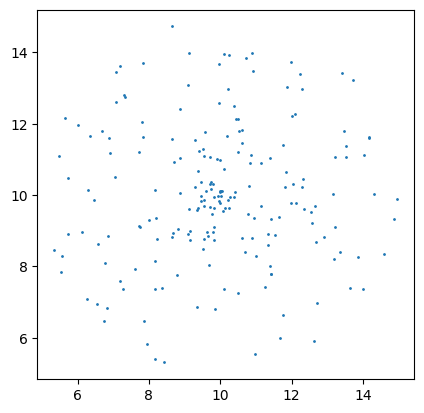

In [3]:
task.visualize()

Solve iteratively using federated learning

In [4]:
# Create server and initialize clients, before iteratively updating the consensus variables
server = Server(task)
server.connect_clients() # create clients with problem description including a partition of the dataset

problem = task.get_problem()

k = 0
last_cost = float('infinity')
while k < problem.max_iter and server.delta > problem.tol:
    consensus = server.consensus.flatten()
    
    current_cost = problem.loss(consensus, task.dataset, problem.hyper_parameters)
    
    if k % 500 == 0:
        print(f'''
        Iteration {k}: {consensus}
        Cost: {current_cost}

        ''')
    
    # perform new iteration
    server.run_iteration(k+1)
    
    if np.linalg.norm(current_cost - last_cost) < problem.ctol:
        print(f"Condition reached: change in cost is {np.linalg.norm(current_cost - last_cost)} "
              f"which is smaller than {problem.ctol}")
        last_cost = current_cost
        break
        
    last_cost = current_cost
    
    k = k + 1
    
solution = server.consensus.flatten()

if k >= problem.max_iter and server.delta > problem.tol:
    raise Exception("Did not converge")
    
if server.delta <= problem.tol:
    print(f"Condition reached: change in solution is {server.delta} "
          f"which is smaller than {problem.tol}")

print("")
print(f"Solution: {solution}")
print(f"Associated cost: {last_cost}")
print(f"Achieved in {k} iterations")


        Iteration 0: [1.87822026 1.31425778 0.05656217]
        Cost: 141.54754337905806

        
Condition reached: change in cost is 0.00017447556097316408 which is smaller than 0.001

Solution: [9.98969889 9.8056971  4.72076825]
Associated cost: 1.2089830755732243
Achieved in 50 iterations


## Visualization of the solution

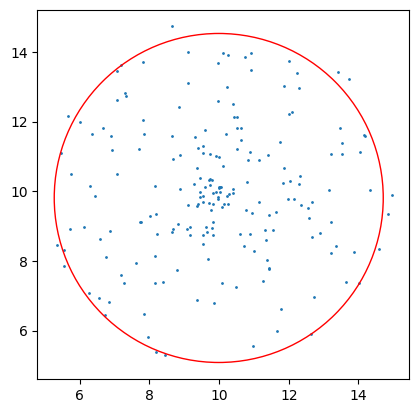

In [5]:
task.visualize_solution(solution)